In [1]:
import pandas as pd
import numpy as np
from pandas import Series
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as stats 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')


<Axes: xlabel='Date'>

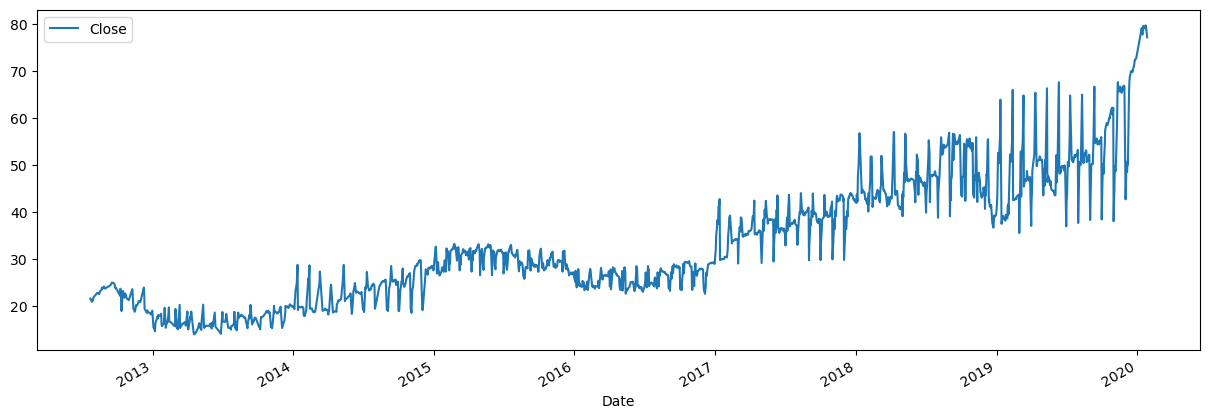

In [2]:
def load_csv(name):
    time_series = pd.read_csv(name)
    time_series = time_series[["Date","Close"]]
    time_series.Date = pd.to_datetime(time_series.Date, format ="%Y-%m-%d")
    time_series.set_index('Date',inplace=True) 
    return time_series

def plotTimeseries(data):
    return data.plot(figsize = (15,5))

name = "yahoo.csv"
time_series = load_csv(name)
plotTimeseries(time_series)

This is our time series for Apple stock prices from 2000 - 2018

In [3]:
def summary_statistics(df):
    
    # Checking if histogram fits a Gaussian Curve
    df.hist(figsize=(5, 5))
    plt.show()
    
    

In [4]:
def adf_test(df):
    # Augmented Dickey-Fuller statistic test 
    print("Augmented Dickey-Fuller Test for stationarity")
    
    result = adfuller(df)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    
    p = result[1]
    if (p > 0.05):
        print("p-value > 0.05, Time Series NOT Stationary")
        return 1
    else:
        print("p-value <= 0.05, Time Series is Stationary")
        return 0
    
    

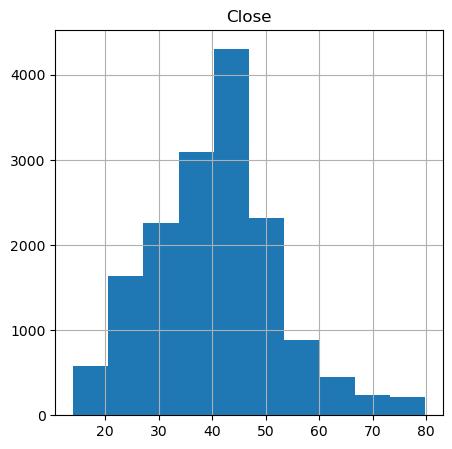

Augmented Dickey-Fuller Test for stationarity
ADF Statistic: -4.222518137891737
p-value: 0.0006033960748676738
p-value <= 0.05, Time Series is Stationary


0

In [9]:
summary_statistics(time_series)
adf_test(time_series)